In [3]:
from pathlib import Path
import json
import pandas as pd
import nltk
import re
import io
from nltk.corpus import stopwords, reuters
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.feature_extraction.text import CountVectorizer
import hvplot.pandas as hv
import plotly.express as px
import plotly.graph_objects as go
lemmatizer = WordNetLemmatizer()

path = Path('Nanosafety_2005_2010.csv')

scopus = pd.read_csv(path)


for row in scopus:
    big_string_title = ''.join(str(scopus['Title']))
    big_string_content = ''.join(str(scopus['Content']))
sw = set(stopwords.words('english'))
regex = re.compile("[^a-zA-Z ]")
wordlist = re.sub("[^\w]", " ", 'ha').split()
sw_addons = {'of', 'and', 'for', 'in', 'a', 'the', 'one', 'by', 'inf inf', 'with', 'an', 'using', 'via', 'based', 'nan', 'date', 'used', 'b', 'tio', 'nanote'}
sw_addons.update(wordlist)
re_clean_title = regex.sub('', big_string_title)
re_clean_content = regex.sub('', big_string_content)
words_title = word_tokenize(re_clean_title)
words_content = word_tokenize(re_clean_content)
lem_title = [lemmatizer.lemmatize(word) for word in words_title]
lem_content = [lemmatizer.lemmatize(word) for word in words_content]
output_title = [word.lower() for word in lem_title if word.lower() not in sw.union(sw_addons)]
output_content = [word.lower() for word in lem_content if word.lower() not in sw.union(sw_addons)]
full_string_title = ' '.join(output_title)
full_string_content = ' '.join(output_content)

In [4]:
scopus['Date'] = pd.DatetimeIndex(scopus['Date'])
scopus

,Date,Title,Content
0,2010-12-15,Pulmonary responses to printer toner particles...,The release of ultrafine particles from office...
1,2010-12-14,Strategy for the modification of electrospun f...,A method to functionalize surfaces of electros...
2,2010-12-10,Management of nanomaterials safety in research...,"Despite numerous discussions, workshops, revie..."
3,2010-12-07,In vitro model on glass surfaces for complex i...,This report establishes an in vitro model on g...
4,2010-12-01,"The evolving nanotechnology environmental, hea...",NaN
...,...,...,...
192,2005-12-01,Translocation of inhaled TiO<inf>2</inf> nanop...,Nanosized TiO2 is widely used for cleaning air...
193,2005-10-01,Status of study on biological and toxicologica...,Because the physical and chemical properties o...
194,2005-04-01,The promise and threat of nanotechnology: Can ...,The growing presence of the products of nanote...
195,2005-03-01,Environmentally responsible development of nan...,NaN


In [71]:

grouped_title = scopus[['Date','Title']].groupby(pd.Grouper(key='Date', axis = 0,
                      freq='Y')).agg(lambda col: ' '.join(col))
grouped_title = grouped_title.reset_index()
grouped_title

,Date,Title
0,2005-12-31,Societal implications of nanoscience and nanot...
1,2006-12-31,The promise and threat of nanotechnology: Can ...
2,2007-12-31,Influence of intranasal instilled titanium dio...
3,2008-12-31,Low cytotoxicity and lysosome location of malo...
4,2009-12-31,Dispersion and stability of TiO<inf>2</inf> na...
5,2010-12-31,Functionalization of Cloisite 30B with fluores...


In [72]:
for row in grouped_title['Title']:
    row = ' '.join(row).lower()
grouped_title

,Date,Title
0,2005-12-31,Societal implications of nanoscience and nanot...
1,2006-12-31,The promise and threat of nanotechnology: Can ...
2,2007-12-31,Influence of intranasal instilled titanium dio...
3,2008-12-31,Low cytotoxicity and lysosome location of malo...
4,2009-12-31,Dispersion and stability of TiO<inf>2</inf> na...
5,2010-12-31,Functionalization of Cloisite 30B with fluores...


In [73]:
dictionary ={}
sw = set(stopwords.words('english'))
sw_addons = {'inf', 'nano', 'based', 'effect', 'impact', ''}

for i in range(len(grouped_title)):
    wordcloud = WordCloud(stopwords = sw.union(sw_addons), collocations=True).generate(row)
    text = wordcloud.process_text(row)
    word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}
    


NameError: name 'text_dictionary' is not defined

In [74]:
# create a list of years
grouped_title = grouped_title.reset_index()
grouped_title.Title = grouped_title.Title.astype(str)
years = grouped_title.Date.unique()


In [75]:
years_df = pd.DataFrame(years)
years_df.columns = ['Date']
years_df

,Date
0,2005-12-31
1,2006-12-31
2,2007-12-31
3,2008-12-31
4,2009-12-31
5,2010-12-31


In [76]:
corpus = [''.join(str(grouped_title[(grouped_title.Date == year)].Title.tolist())) for year in years]
#corpus

In [77]:


cv=CountVectorizer(ngram_range=(1, 2), stop_words = sw.union(sw_addons))
X = cv.fit_transform(corpus)
X = X.toarray()

bow=pd.DataFrame(X, columns = cv.get_feature_names())
main_df = pd.merge(years_df, bow, right_index=True, left_index=True)
main_df = main_df.set_index('Date')
main_df



,02,02 061,061,061 financial,10,10 1016,1016,1016 cplett,12,12 cage,...,zinc oxide,znga,znga nanowire,zno,zno nanoparticles,zno tio,zwerge,zwerge erobern,éthique,éthique de
Date,,,,,,,,,,,,,,,,,,,,,
2005-12-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2006-12-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007-12-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2008-12-31,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
2009-12-31,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,1
2010-12-31,0,0,0,0,0,0,0,0,1,1,...,3,1,1,2,1,1,0,0,0,0


In [78]:
big_dict = {}
for n in range(len(main_df)): 
    text= main_df.iloc[n].sort_values(ascending=False)[:4000]
    text_top = text[:20]
    text2_dict=text_top20.sort_values(ascending=False).to_dict()
    big_dict.update({main_df.index[n]: text2_dict})
    
wordcloud = WordCloud(min_word_length =3, background_color='white')

wordcloud.generate_from_frequencies(text2_dict)

big_dict_df = pd.DataFrame(big_dict)
big_dict_df

,2005-12-31,2006-12-31,2007-12-31,2008-12-31,2009-12-31,2010-12-31
nanotechnology,4,4,4,4,4,4
arms,1,1,1,1,1,1
arms control,1,1,1,1,1,1
military nanotechnology,1,1,1,1,1,1
tio nanoparticles,1,1,1,1,1,1
environmental,1,1,1,1,1,1
tio,1,1,1,1,1,1
responsible,1,1,1,1,1,1
environmental ethics,1,1,1,1,1,1
environmentally,1,1,1,1,1,1


In [49]:
main_df.index[0]

Timestamp('2005-12-31 00:00:00')

In [26]:
?main_df.sort_values

Signature:
main_df.sort_values(
    by,
    axis=0,
    ascending=True,
    inplace=False,
    kind='quicksort',
    na_position='last',
    ignore_index=False,
    key: Union[Callable[[ForwardRef('Series')], Union[ForwardRef('Series'), ~AnyArrayLike]], NoneType] = None,
)
Docstring:
Sort by the values along either axis.

Parameters
----------
        by : str or list of str
            Name or list of names to sort by.

            - if `axis` is 0 or `'index'` then `by` may contain index
              levels and/or column labels.
            - if `axis` is 1 or `'columns'` then `by` may contain column
              levels and/or index labels.

            .. versionchanged:: 0.23.0

               Allow specifying index or column level names.
axis : {0 or 'index', 1 or 'columns'}, default 0
     Axis to be sorted.
ascending : bool or list of bool, default True
     Sort ascending vs. descending. Specify list for multiple sort
     orders.  If this is a list of bools, must match the l

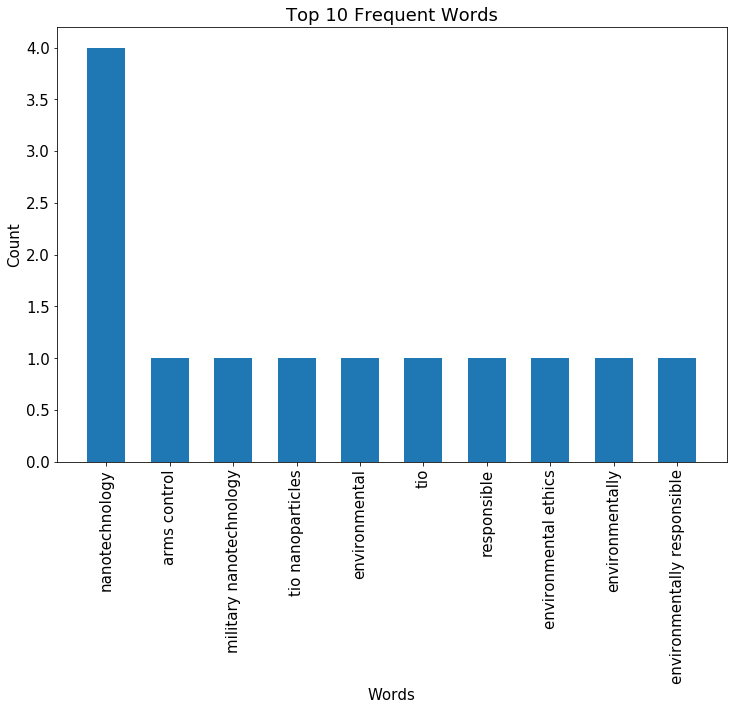

In [82]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rc('font', size=15) 
bar = plt.bar(*zip(*text_top20.items()), width = .6, orientation = 'vertical')
plt.xticks(rotation = 90)
plt.xlabel("Words")
plt.ylabel("Count")
plt.title("Top 10 Frequent Words")
plt.show()

In [ ]:
rel_freq=wordcloud.words_
print(list(word_freq.items())[:10])
print(list(rel_freq.items())[:10])

In [ ]:
df = pd.DataFrame.from_dict(text2_dict.items())
df.columns = ['Word', 'Count']

In [ ]:
fig = px.bar(df, x='Word', y='Count')
fig.show()